In [82]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

using JLD2
using ProgressMeter
using LinearAlgebra
using Distributions
using StatsPlots
using Plots
default(label="", grid=false, linewidth=3, markersize=3, margin=15Plots.pt)

  Activating project at `c:\Syndr\Wouter\Onderzoek\Projecten\tue\efe-planning\IWAI2024-ambiguity`


In [100]:
results_EFE2 = load("results/botnav-cart2polar-EFE2.jld2")
results_EFE1 = load("results/botnav-cart2polar-EFE1.jld2")
results_EFER = load("results/botnav-cart2polar-EFER.jld2")

len_trial = results_EFE2["len_trial"]
tsteps = range(0, step=results_EFE2["Δt"], length=results_EFE2["len_trial"])

F_EFE2 = results_EFE2["F"]
F_EFE1 = results_EFE1["F"]
F_EFER = results_EFER["F"]

J_EFE2 = results_EFE2["J"]
J_EFE1 = results_EFE1["J"]
J_EFER = results_EFER["J"]

ix = 1:10

1:10

In [101]:
tJ_EFE2 = round(mean(J_EFE2[:,ix]), digits=2)
tJ_EFE1 = round(mean(J_EFE1[:,ix]), digits=2)
tJ_EFER = round(mean(J_EFER[:,ix]), digits=2)

println("Total J EFE2 = $tJ_EFE2")
println("Total J EFE1 = $tJ_EFE1")
println("Total J EFER = $tJ_EFER")

Total J EFE2 = 4.89
Total J EFE1 = 4.06
Total J EFER = 4.49


In [102]:
tF_EFE2 = round(mean(F_EFE2[:,ix]), digits=2)
tF_EFE1 = round(mean(F_EFE1[:,ix]), digits=2)
tF_EFER = round(mean(F_EFER[:,ix]), digits=2)

println("Total F EFE2 = $tF_EFE2")
println("Total F EFE1 = $tF_EFE1")
println("Total F EFER = $tF_EFER")

Total F EFE2 = 2205.31
Total F EFE1 = 62017.68
Total F EFER = 90330.67


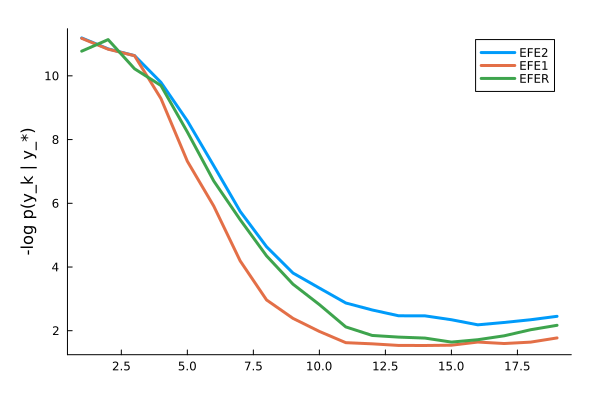

In [116]:
plot(ylabel="-log p(y_k | y_*)")
plot!(mean(J_EFE2[2:end,ix], dims=2), label="EFE2")
plot!(mean(J_EFE1[2:end,ix], dims=2), label="EFE1")
plot!(mean(J_EFER[2:end,ix], dims=2), label="EFER")
# plot!(mean(YGP_MPC[:,ix], dims=2), label="MPC")

In [150]:
mean(F_EFE2[2:end,:], dims=2)

19×1 Matrix{Float64}:
    1.5254057730567148
    1.0651233107485127
    0.28269104511452803
   -0.10244963910902509
    3.3140756113101455
   63.53676094542057
  413.91484883871635
  889.986739143996
 1076.2430137921847
 1248.5536857996417
 2233.810487479751
 1775.7857840603676
 2809.0954060735958
 4660.695408085562
 6806.361127694889
 8341.312087573227
 6465.394538058108
 4527.427957998594
 2788.053465234121

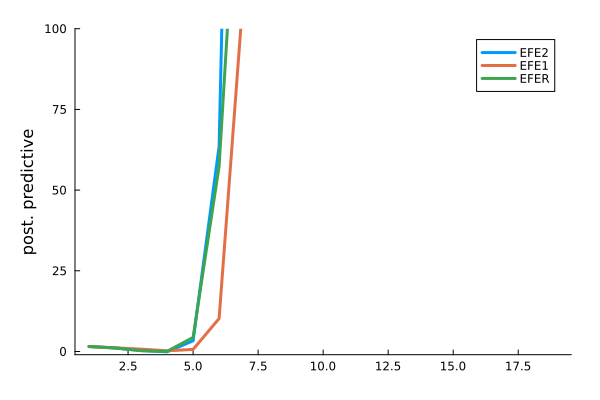

In [148]:
plot(ylabel="post. predictive", ylims=(-1,100))
plot!(mean(F_EFE2[2:end,ix], dims=2), label="EFE2")
plot!(mean(F_EFE1[2:end,ix], dims=2), label="EFE1")
plot!(mean(F_EFER[2:end,ix], dims=2), label="EFER")

In [34]:
# violin(tsteps[1:5:end], FE2_EFE2[1:5:end,ix], color=:blue, side=:right, linewidth=0)
# violin!(tsteps[1:5:end], FE2_EFE2[1:5:end,ix], color=:red, side=:left, linewidth=0)

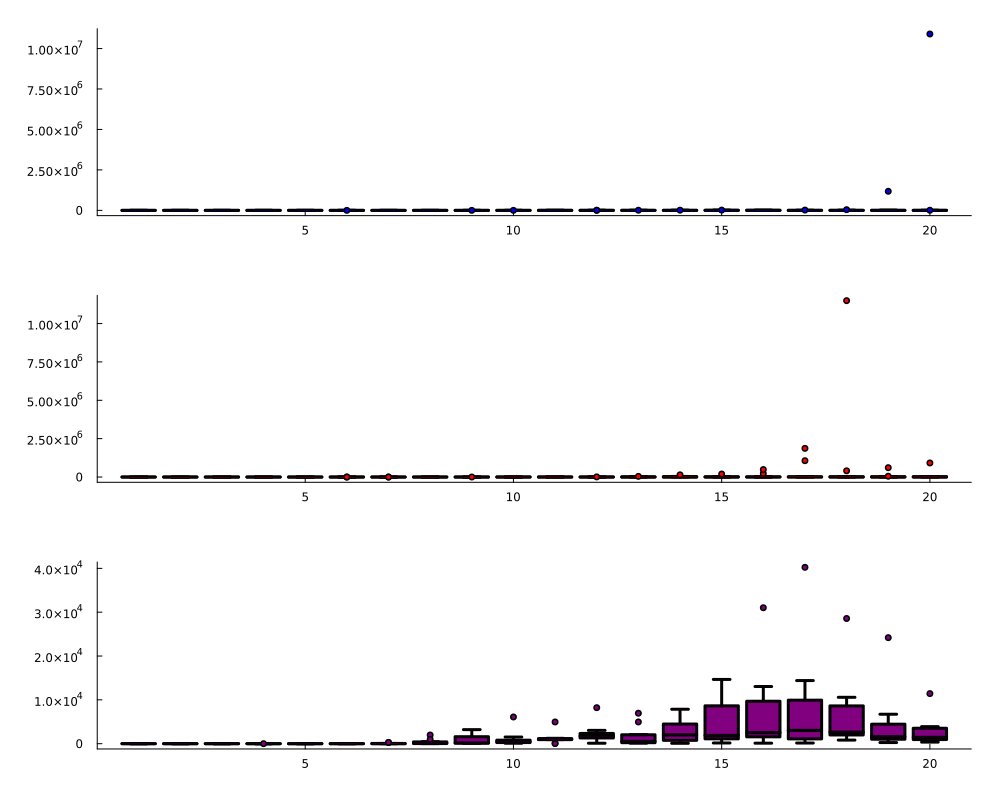

In [107]:
p1 = boxplot(F_EFE1[:,ix]', color="blue")
p2 = boxplot(F_EFER[:,ix]', color="red")
p3 = boxplot(F_EFE2[:,ix]', color="purple")

plot(p1,p2,p3, layout=(3,1), size=(1000,800))

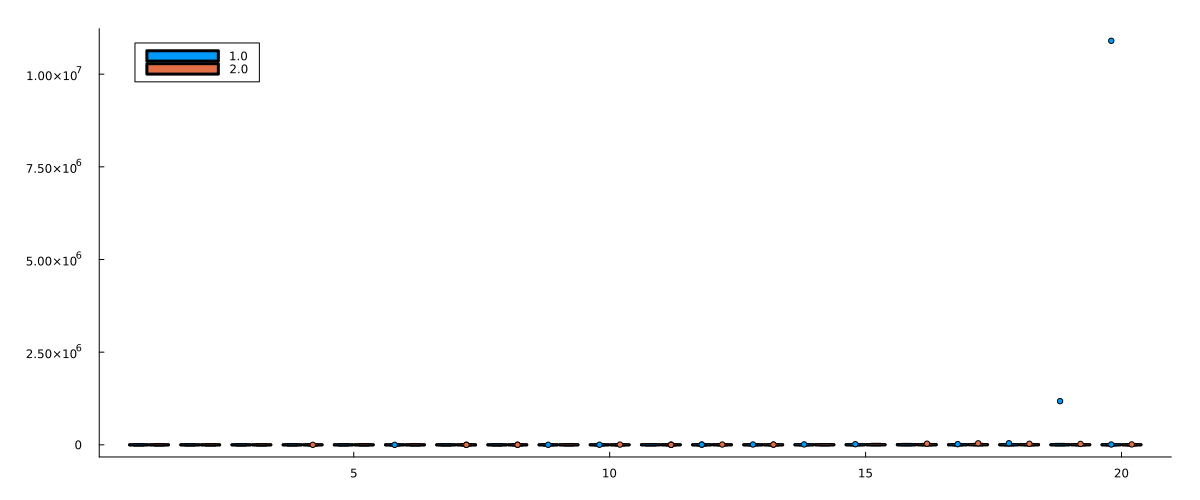

In [112]:
# yl = (-5, 100)

FF  = [F_EFE1[:]; F_EFE2[:]]
FFX = [repeat(range(1,len_trial), length(ix)); repeat(range(1,len_trial), length(ix))]
FFM = [ones((len_trial)*length(ix)); 2*ones((len_trial)*length(ix))]

groupedboxplot(FFX, FF, group = FFM)
plot!(size=(1200,500))

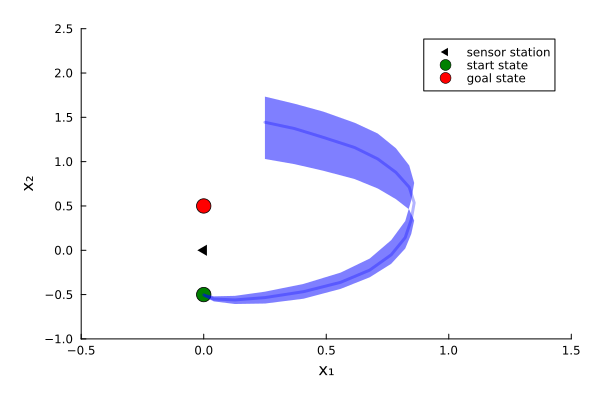

In [156]:
xl = (-.5,1.5)
yl = (-1.,2.5)

z_0 = results_EFE2["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, .5, 0.0, 0.0]

zs_sim = zeros(4,len_trial,ix[end])

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

k = len_trial
for jj in ix
    results_EFE2 = load("results/botnav-cart2polar-EFE2-$jj.jld2")
    zs_sim[:,:,jj] = results_EFE2["z_sim"]
end

mz_sim = mean(zs_sim, dims=3)
sz_sim = std( zs_sim, dims=3) 

plot!(mz_sim[1,:], mz_sim[2,:], ribbon=(sz_sim[1,:], sz_sim[2,:]), color="blue", alpha=0.3)

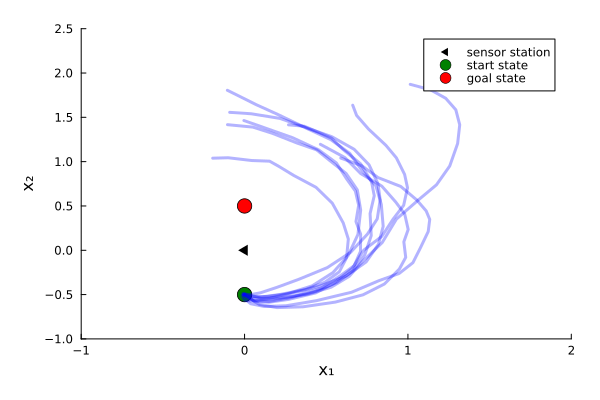

In [157]:
xl = (-1.,2.)
yl = (-1.,2.5)

z_0 = results_EFE2["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, .5, 0.0, 0.0]

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

k = len_trial
for jj in ix
    results_EFE2 = load("results/botnav-cart2polar-EFE2-$jj.jld2")
    z_sim = results_EFE2["z_sim"]
    # z_est = results_EFE2["z_est"]

    # plot!(z_est[1][1,1:k], z_est[1][2,1:k], c="purple", marker=".", label="state estimates", alpha=0.1, markersize=5)
    # for j in 1:len_trial
    #     covellipse!(z_est[1][1:2,j], z_est[2][1:2,1:2,j], n_std=1, color="purple", linewidth=0, fillalpha=0.01)
    # end

    plot!(z_sim[1,:], z_sim[2,:], color="blue", alpha=0.3)
end
plot!()

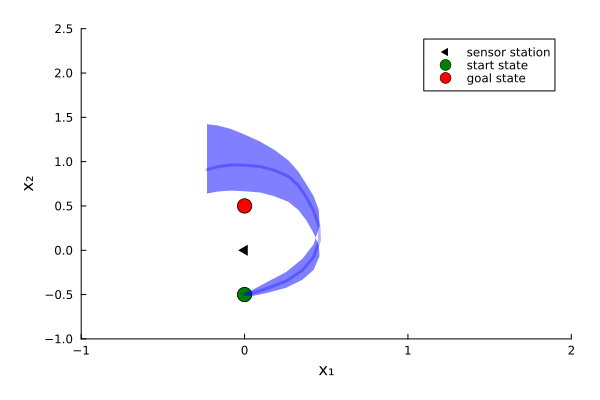

In [158]:
xl = (-1.,2.)
yl = (-1.,2.5)

z_0 = results_EFE1["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, .5, 0.0, 0.0]

zs_sim = zeros(4,len_trial,ix[end])

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

k = len_trial
for jj in ix
    results_EFE1 = load("results/botnav-cart2polar-EFE1-$jj.jld2")
    zs_sim[:,:,jj] = results_EFE1["z_sim"]
end

mz_sim = mean(zs_sim, dims=3)
sz_sim = std( zs_sim, dims=3) 

plot!(mz_sim[1,:], mz_sim[2,:], ribbon=(sz_sim[1,:], sz_sim[2,:]), color="blue", alpha=0.3)

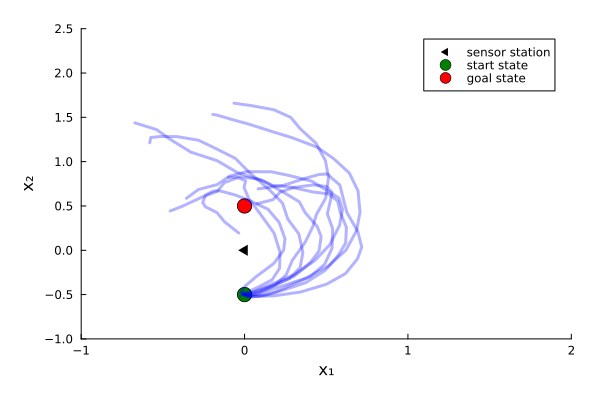

In [159]:
z_0 = results_EFE2["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, .5, 0.0, 0.0]

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

for jj in ix
    results_EFE1 = load("results/botnav-cart2polar-EFE1-$jj.jld2")
    z_sim_EFE1 = results_EFE1["z_sim"]
    plot!(z_sim_EFE1[1,:], z_sim_EFE1[2,:], color="blue", alpha=0.3)
end
plot!()

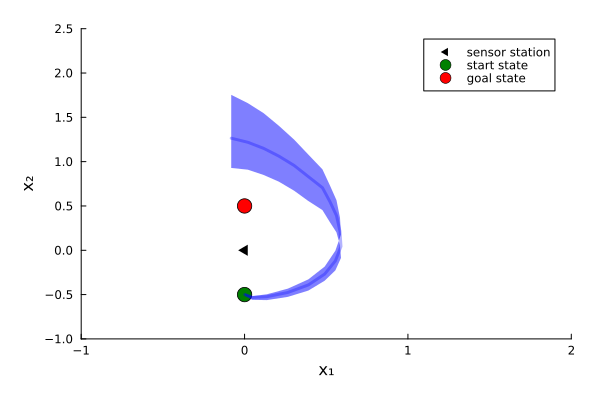

In [160]:
xl = (-1.,2.)
yl = (-1.,2.5)

z_0 = results_EFER["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, .5, 0.0, 0.0]

zs_sim = zeros(4,len_trial,ix[end])

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

k = len_trial
for jj in ix
    results_EFER = load("results/botnav-cart2polar-EFER-$jj.jld2")
    zs_sim[:,:,jj] = results_EFER["z_sim"]
end

mz_sim = mean(zs_sim, dims=3)
sz_sim = std( zs_sim, dims=3) 

plot!(mz_sim[1,:], mz_sim[2,:], ribbon=(sz_sim[1,:], sz_sim[2,:]), color="blue", alpha=0.3)

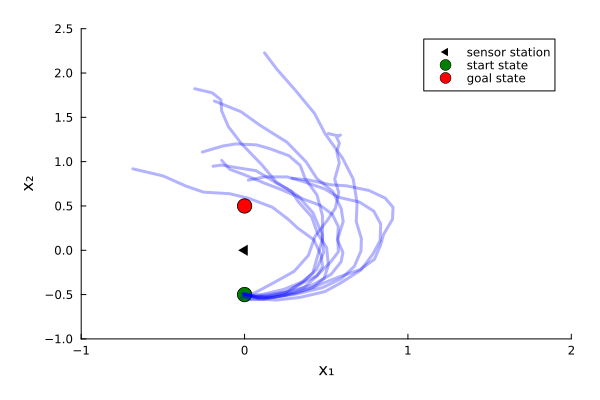

In [162]:
z_0 = results_EFER["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, .5, 0.0, 0.0]

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

for jj in ix
    results_EFER = load("results/botnav-cart2polar-EFER-$jj.jld2")
    z_sim_EFER = results_EFER["z_sim"]
    plot!(z_sim_EFER[1,:], z_sim_EFER[2,:], color="blue", alpha=0.3)
end
plot!()